In [54]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [55]:
def compute_correlation(glcm_normalized):
    levels = glcm_normalized.shape[0]
    
    # Marginal probabilities
    p_x = np.sum(glcm_normalized, axis=1)  # row sums
    p_y = np.sum(glcm_normalized, axis=0)  # col sums
    
    # Means
    m_r = np.sum([i * p_x[i] for i in range(levels)])
    m_c = np.sum([j * p_y[j] for j in range(levels)])
    
    # Standard deviations
    std_r = np.sqrt(np.sum([(i - m_r)**2 * p_x[i] for i in range(levels)]))
    std_c = np.sqrt(np.sum([(j - m_c)**2 * p_y[j] for j in range(levels)]))
    
    # Handle divide by zero case
    if std_r == 0 or std_c == 0:
        return 1.0
    
    # Correlation
    correlation = 0
    for i in range(levels):
        for j in range(levels):
            correlation += ((i - m_r) * (j - m_c) * glcm_normalized[i, j]) / (std_r * std_c)
    
    return correlation

In [56]:
# A function to compute homogeneity from the normailzed glcm
def compute_homogeneity(glcm_normalized):
  levels = glcm_normalized.shape[0]
  homogeneity = 0
  for i in range(levels):
    for j in range(levels):
      homogeneity = homogeneity + glcm_normalized[i,j] / (1 + abs(i - j))
  return homogeneity

In [57]:
# A function to compute entropy from the normailzed glcm
def compute_entropy(glcm_normalized):
  levels = glcm_normalized.shape[0]
  entropy = 0
  for i in range(levels):
    for j in range(levels):
      if(glcm_normalized[i,j] > 0):
        entropy = entropy - glcm_normalized[i,j] * np.log2(glcm_normalized[i,j])
  return entropy

In [58]:
# A function to find the contrast of the normalized glcm matrix
def compute_contrast(glcm_normalized):
    levels = glcm_normalized.shape[0]
    contrast = 0
    for i in range(levels):
        for j in range(levels):
            contrast += (i - j) ** 2 * glcm_normalized[i, j]
    return contrast

In [59]:
# A function to normalize the glcm matrix
def normalize_glcm(glcm):
    glcm_sum = np.sum(glcm)
    if glcm_sum == 0:
        return glcm
    return glcm / glcm_sum

In [60]:
# A function to compute the energy of the normalized glcm matrix
def compute_energy(glcm_normalized):
    return np.sum(glcm_normalized**2)

In [61]:
# A function to compute the maximum among the normalized_glcm matrix
def compute_max(glcm_normalized):
    return np.max(glcm_normalized)

In [62]:
# A function to compute GLCM from the input image
def compute_GLCM(input_image,number_of_levels):
  
  # First we need to initialize the GLCM matrix
  glcm = np.zeros((number_of_levels,number_of_levels),dtype=np.uint32)
  
  # Here the predicate is that 
  # we are considering the pixel to the right of the current pixel
  
  h,w = input_image.shape
  # Iterate over the image and compute the GLCM
  for i in range(h):
    for j in range(w-1):
      row = input_image[i][j]
      col = input_image[i][j+1]
      glcm[row][col] += 1
      # glcm[col][row] += 1 
  
  # Normalize the GLCM matrix
  glcm_normalized = normalize_glcm(glcm)
  
  # glcm_clipped = np.clip(glcm,0,255).astype(np.uint8)
  return (glcm,glcm_normalized)
  

  



In [63]:
# First read the image as a grayscale image
input_image_1 = cv2.imread('../../../data/uniform_noise.tif', cv2.IMREAD_GRAYSCALE)
# Call the function to compute GLCM
glcm_1_show,glcm_1_normalized = compute_GLCM(input_image = input_image_1,number_of_levels=256)
# Find the maximum value in the normalized GLCM
max_value_1 = compute_max(glcm_1_normalized)
# Find the energy of the normalized GLCM
energy_1 = compute_energy(glcm_1_normalized)
# Find the contrast of the normalized GLCM
contrast_1 = compute_contrast(glcm_1_normalized)
entropy_1 = compute_entropy(glcm_1_normalized)
homo_1 = compute_homogeneity(glcm_1_normalized)
corr_1 = compute_correlation(glcm_1_normalized)
glcm_1 = np.clip(glcm_1_show,0,255).astype(np.uint8)



input_image_2 = cv2.imread('../../../data/sinusoidal_noise.tif', cv2.IMREAD_GRAYSCALE)
 # Call the function to compute GLCM
glcm_2_show,glcm_2_normalized = compute_GLCM(input_image = input_image_2,number_of_levels=256)
# Find the maximum value in the normalized GLCM
max_value_2 = compute_max(glcm_2_normalized)
energy_2 = compute_energy(glcm_2_normalized)
# Find the contrast of the normalized GLCM
contrast_2 = compute_contrast(glcm_2_normalized)
entropy_2 = compute_entropy(glcm_2_normalized)
homo_2 = compute_homogeneity(glcm_2_normalized)
corr_2 = compute_correlation(glcm_2_normalized)
glcm_2 = np.clip(glcm_2_show,0,255).astype(np.uint8) 



input_image_3 = cv2.imread('../../../data/ckt_board.tif', cv2.IMREAD_GRAYSCALE)
# Call the function to compute GLCM
glcm_3_show, glcm_3_normalized = compute_GLCM(input_image = input_image_3,number_of_levels=256)
# Find the maximum value in the normalized GLCM
max_value_3 = compute_max(glcm_3_normalized)
energy_3 = compute_energy(glcm_3_normalized)
# Find the contrast of the normalized GLCM
contrast_3 = compute_contrast(glcm_3_normalized)
entropy_3 = compute_entropy(glcm_3_normalized)
home_3 = compute_homogeneity(glcm_3_normalized)
corr_3 = compute_correlation(glcm_3_normalized)
glcm_3 = np.clip(glcm_3_show,0,255).astype(np.uint8)



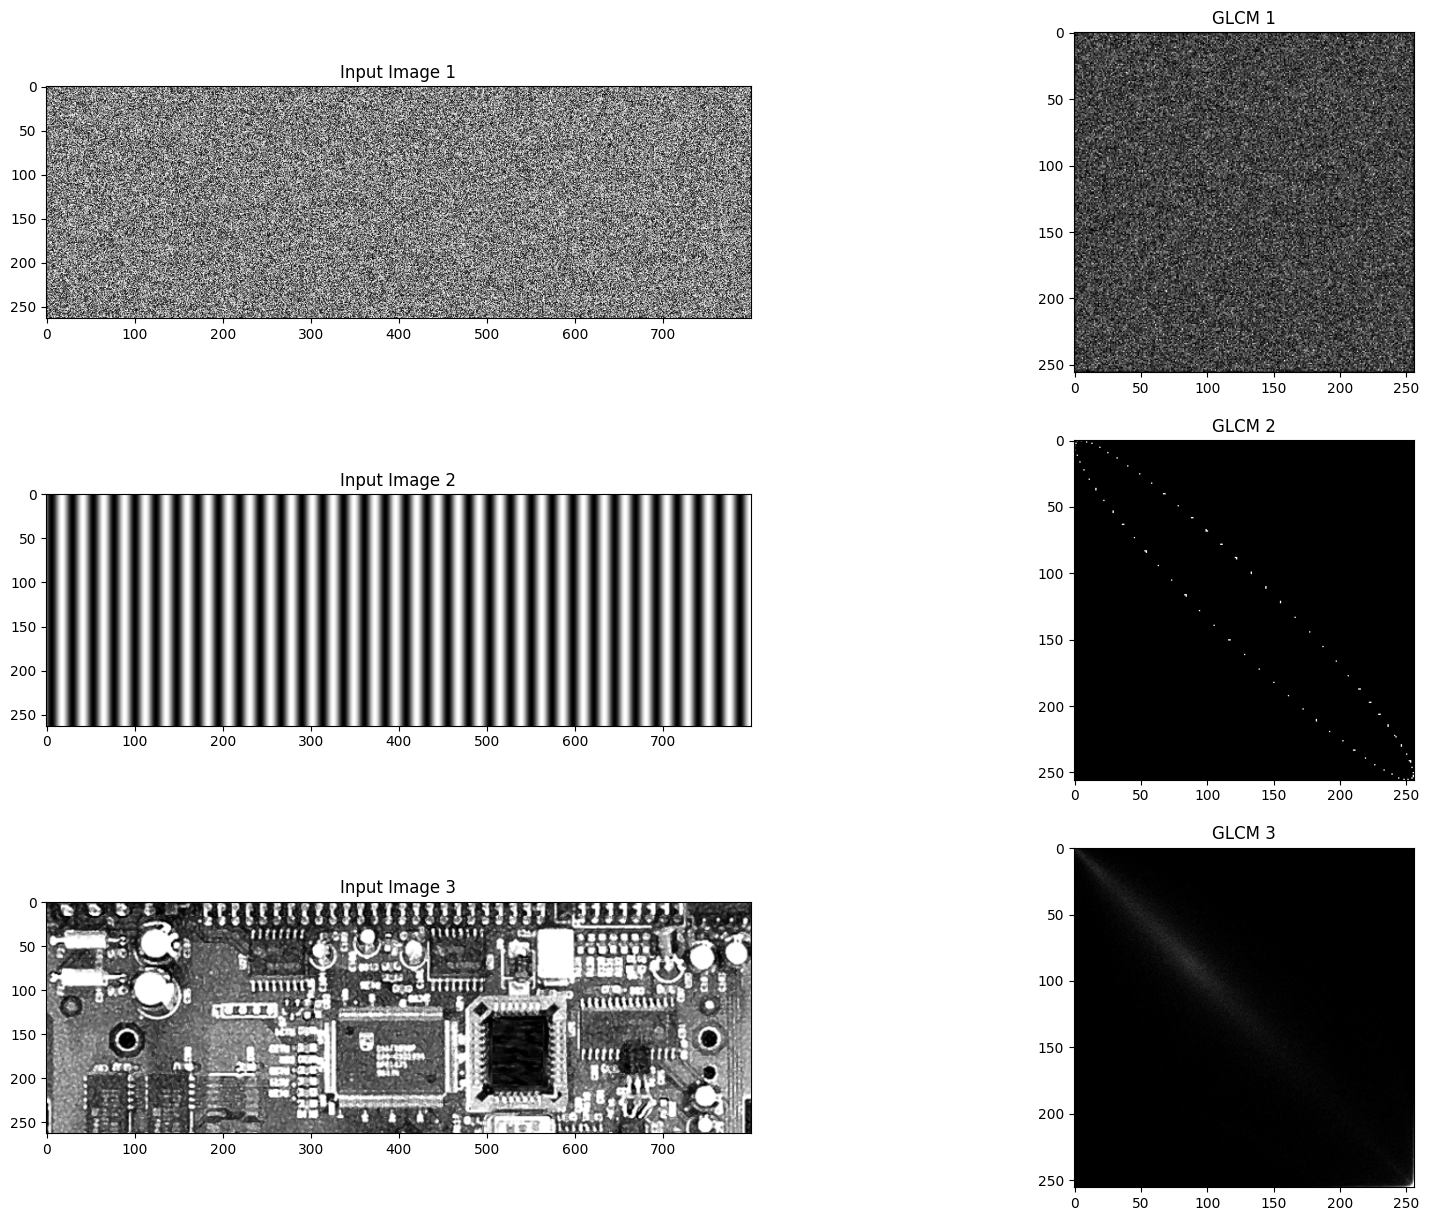

In [64]:
# Now display the GLCM
plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
plt.title("Input Image 1")
plt.imshow(input_image_1,cmap='gray')

plt.subplot(3,2,2)
plt.title("GLCM 1")
plt.imshow(glcm_1_show,cmap='gray')

plt.subplot(3,2,3)
plt.title("Input Image 2")
plt.imshow(input_image_2,cmap='gray')

plt.subplot(3,2,4)
plt.title("GLCM 2")
plt.imshow(glcm_2,cmap='gray')

plt.subplot(3,2,5)
plt.title("Input Image 3")
plt.imshow(input_image_3,cmap='gray')

plt.subplot(3,2,6)
plt.title("GLCM 3")
plt.imshow(glcm_3,cmap='gray')




plt.show()



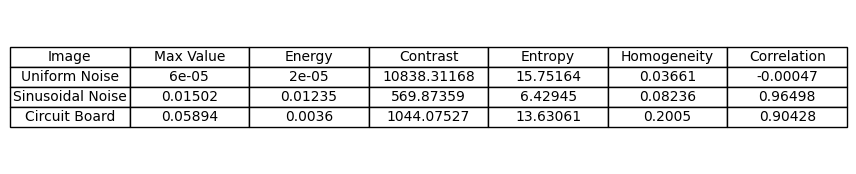

In [65]:


# Data with 5-decimal rounding
data = [
    ["Uniform Noise", round(max_value_1, 5), round(energy_1, 5), round(contrast_1, 5), round(entropy_1, 5),round(homo_1,5),round(corr_1,5)],
    ["Sinusoidal Noise", round(max_value_2, 5), round(energy_2, 5), round(contrast_2, 5), round(entropy_2, 5),round(homo_2,5),round(corr_2,5)],
    ["Circuit Board", round(max_value_3, 5), round(energy_3, 5), round(contrast_3, 5), round(entropy_3, 5),round(home_3,5),round(corr_3,5)],
]

# Column labels
columns = ["Image", "Max Value", "Energy","Contrast","Entropy","Homogeneity","Correlation"]

# Create a figure
fig, ax = plt.subplots(figsize=(9, 2))
ax.axis('off')  # Hide axes

# Create table
table = ax.table(cellText=data, colLabels=columns, cellLoc='center', loc='center')

# Beautify table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # (width, height) scaling

# Show table
plt.show()
